

# Sonar Rock vs Mine Prediction with Python  

sonar data-->data processing-->train/test split---->logistic regression model  


newData----->trained logistic regression model---> predict mine(M)or rock(R)  



importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data collection and data processing

In [7]:
# loading the dataset to pandas dataframe

sonar_data=pd.read_csv('/content/sonar data.csv',header=None)

In [8]:
sonar_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [9]:
# number of row and columns
sonar_data.shape

(208, 61)

In [10]:
# stastical measure of data
sonar_data.describe()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
# checking for null data
sonar_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [12]:
# outcome result validation
sonar_data[60].value_counts()

,count
60,
M,111
R,97


M--->mine
R-->rock

In [13]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [14]:
# seperating data and labels
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

In [15]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [16]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


Training and test data

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [19]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

Model training --->logistic regression

In [20]:
model=LogisticRegression()

In [21]:
# training the Logistic Regression  model with training data
model.fit(X_train,Y_train)

LogisticRegression()

model evaluation

In [22]:
# accuracy on the training data
X_train_prediction=model.predict(X_train)

training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [28]:
print("Accuracy on training data :",training_data_accuracy)

Accuracy on training data : 0.8342245989304813


training vs prediction

In [27]:
outcome=pd.DataFrame({"Actual":Y_train,"Predicted":X_train_prediction})
print (outcome)

    Actual Predicted
115      M         M
38       R         R
56       R         M
123      M         M
18       R         R
..     ...       ...
140      M         M
5        R         R
154      M         M
131      M         M
203      M         M

[187 rows x 2 columns]


visualizing using matlib

<ipython-input-29-0778f5941f06>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Actual", "Predicted"], y=[count_df.loc["M", "Actual"], count_df.loc["M", "Predicted"]], ax=axes[0], palette="Blues")
<ipython-input-29-0778f5941f06>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Actual", "Predicted"], y=[count_df.loc["R", "Actual"], count_df.loc["R", "Predicted"]], ax=axes[1], palette="Reds")


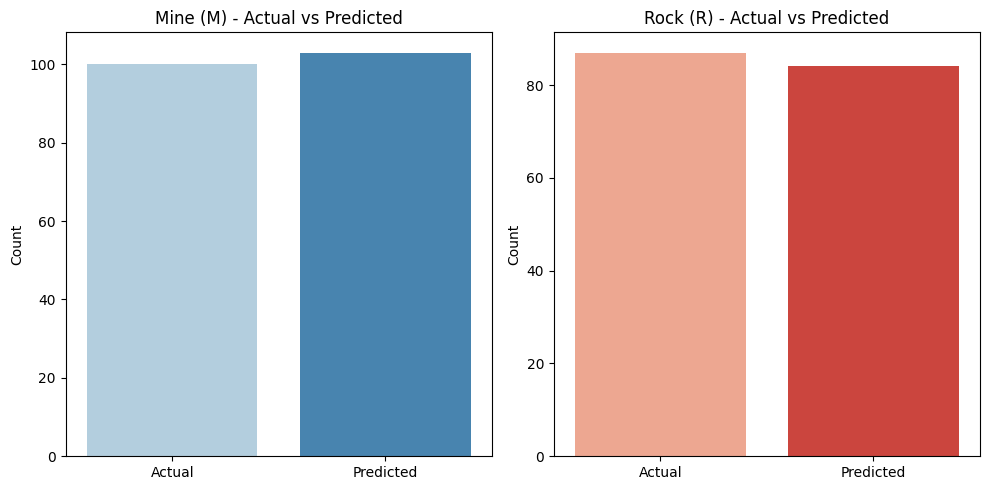

In [29]:
# Count occurrences of 'M' and 'R' in Actual and Predicted
actual_counts = outcome["Actual"].value_counts()
predicted_counts = outcome["Predicted"].value_counts()

# Create a DataFrame with both counts
count_df = pd.DataFrame({"Actual": actual_counts, "Predicted": predicted_counts})

# Plot side-by-side bar graphs for 'M' and 'R'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for 'M' (Mine)
sns.barplot(x=["Actual", "Predicted"], y=[count_df.loc["M", "Actual"], count_df.loc["M", "Predicted"]], ax=axes[0], palette="Blues")
axes[0].set_title("Mine (M) - Actual vs Predicted")
axes[0].set_ylabel("Count")

# Plot for 'R' (Rock)
sns.barplot(x=["Actual", "Predicted"], y=[count_df.loc["R", "Actual"], count_df.loc["R", "Predicted"]], ax=axes[1], palette="Reds")
axes[1].set_title("Rock (R) - Actual vs Predicted")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

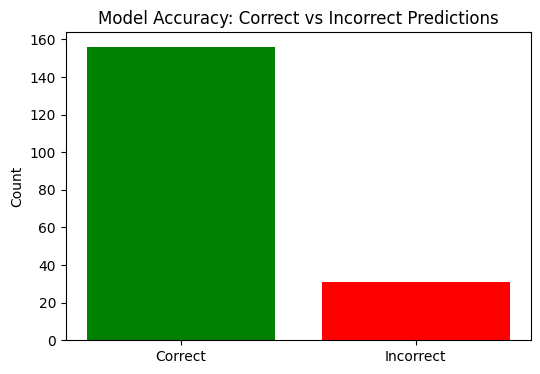

In [30]:
correct = (outcome["Actual"] == outcome["Predicted"]).sum()
incorrect = len(outcome) - correct

plt.figure(figsize=(6, 4))
plt.bar(["Correct", "Incorrect"], [correct, incorrect], color=['green', 'red'])
plt.ylabel("Count")
plt.title("Model Accuracy: Correct vs Incorrect Predictions")
plt.show()

In [31]:
# accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy on test data :",test_data_accuracy)

Accuracy on test data : 0.7619047619047619


In [36]:
outcome_test_data=pd.DataFrame({"Actual":Y_test,"Predicted":X_test_prediction})
print(outcome_test_data)

    Actual Predicted
113      M         M
23       R         R
45       R         R
81       R         M
82       R         M
109      M         M
176      M         M
134      M         M
96       R         R
98       M         M
57       R         R
169      M         M
13       R         R
204      M         M
10       R         R
161      M         M
7        R         M
172      M         M
68       R         R
102      M         R
106      M         R


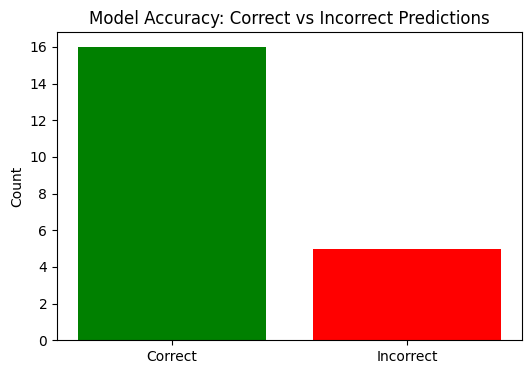

In [37]:
correct_test=(outcome_test_data["Actual"]==outcome_test_data["Predicted"]).sum()
incorrect_test=len(outcome_test_data)-correct_test

plt.figure(figsize=(6, 4))
plt.bar(["Correct", "Incorrect"], [correct_test, incorrect_test], color=['green', 'red'])
plt.ylabel("Count")
plt.title("Model Accuracy: Correct vs Incorrect Predictions")
plt.show()

Making a predictive system

In [32]:
input_data=(0.0240,0.0218,0.0324,0.0569,0.0330,0.0513,0.0897,0.0713,0.0569,0.0389,0.1934,0.2434,0.2906,0.2606,0.3811,0.4997,0.3015,0.3655,0.6791,0.7307,0.5053,0.4441,0.6987,0.8133,0.7781,0.8943,0.8929,0.8913,0.8610,0.8063,0.5540,0.2446,0.3459,0.1615,0.2467,0.5564,0.4681,0.0979,0.1582,0.0751,0.3321,0.3745,0.2666,0.1078,0.1418,0.1687,0.0738,0.0634,0.0144,0.0226,0.0061,0.0162,0.0146,0.0093,0.0112,0.0094,0.0054,0.0019,0.0066,0.0023)
# changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


In [33]:
input_data_as_numpy_array.shape

(60,)

In [34]:
input_data_reshaped.shape

(1, 60)

In [35]:
prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print("The object is a rock")
else:
  print("The object is a mine")

['R']
The object is a rock
